In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2 as cv
import glob


In [12]:
def medianStackFiltering(fileLocation):
    imageFiles = []
    files = glob.glob(fileLocation)
    for file in files:
        imageFiles.append(file)
    imageFiles = imageFiles[25:45]
    
    images = []
    for i in range(len(imageFiles)):
        images.append(cv.imread(imageFiles[i], 1))
    
    rows = len(images[0])
    cols = len(images[0][0])
    
    outputImage = np.zeros((rows, cols, 3))
    
    for r in range(rows):
        for c in range(cols):
            for i in range(3):
                vals = np.zeros(len(images))
                for j in range(len(images)):
                    vals[j] = images[j][r][c][i]
                outputImage[r][c][i] = np.median(vals)
    return outputImage
    
        

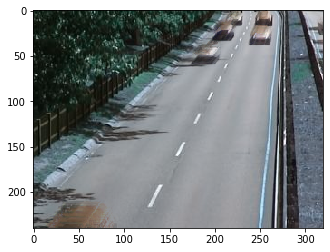

In [13]:
msfPrediction = medianStackFiltering('TestHighwayImages/*.jpg')
import matplotlib.pyplot as plt
plt.imshow(msfPrediction.astype(int))

In [14]:
cv.imwrite('MEDIANSTACKFILTER.png', msfPrediction.astype(int))

True